In [4]:
#Import required libraries :
import pandas as pd

import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

nltk.download("popular")
     

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sreekar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/sreekar/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/sreekar/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/sreekar/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/sreekar/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/sreekar/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nlt

True

In [6]:
data="/Users/sreekar/Documents/pds/sentiment/dataset/Corona_NLP_test.csv"
df_raw = pd.read_csv(data,index_col=0)


In [7]:
df_raw.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
UserName,,,,,
1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [8]:
print("Number of Rows: {}\nNumber of Columns: {}".format(df_raw.shape[0], df_raw.shape[1]))

Number of Rows: 3798
Number of Columns: 5


In [9]:
df_raw.isnull().sum()

ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [10]:
df_raw.dropna(inplace = True)

In [11]:
print("Number of Rows: {}\nNumber of Columns: {}".format(df_raw.shape[0], df_raw.shape[1]))

Number of Rows: 2964
Number of Columns: 5


In [12]:
df_raw.index= pd.RangeIndex(start=1, stop=1+len(df_raw), step=1)

In [13]:
df_raw.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
3,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral


In [14]:
df_raw.duplicated().sum()

0

In [15]:
df_raw.to_csv('cleandata.csv',index=False)

In [16]:
#data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"http\S+", "")
#data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"@\S+", "")
#data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"[^a-zA-Z0-9\s]", "") # Updated regex
#data['OriginalTweet'] = data['OriginalTweet'].str.lower()
#data = data[data['OriginalTweet'].notna() & data['OriginalTweet'] != ""]

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/sreekar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df_OriginalTweet =df_raw['OriginalTweet']

In [32]:
#removing special characters,urls,stopwords

from nltk.corpus import stopwords
import re



stopwords = set(stopwords.words("english"))
corpus = []
for i in range(1, len(df_OriginalTweet)):
  review = re.sub(r"https?:[^\s]+", " " ,df_OriginalTweet[i])
  review = re.sub('[^a-zA-Z]',' ', review)
  review = review.lower()
  review = review.split()
  review = [word for word in review if not word in stopwords]
  review = ' '.join(review)
  corpus.append(review)

In [34]:
print(corpus)

['trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold online grocers foodkick maxdelivery coronavirus fearing shoppers stock', 'find hand sanitizer fred meyer turned amazon pack purell check coronavirus concerns driving prices', 'panic buying hits newyork city anxious shoppers stock food amp medical supplies healthcare worker becomes bigapple st confirmed coronavirus patient bloomberg staged event qanon qanon qanon election cdc', 'toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper', 'remember last time paid gallon regular gas los angeles prices pump going look coronavirus impacting prices pm abc', 'drtedros stop covid without protecting healthworkers prices surgical masks increased six fold n respirators trebled amp gowns cost twice much drtedros coronavirus', 'anyone supermarket last days went normal sho

In [24]:
OriginalTweet_para = ' '.join(str(e) for e in corpus)
print(OriginalTweet_para)

trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold online grocers foodkick maxdelivery coronavirus fearing shoppers stock find hand sanitizer fred meyer turned amazon pack purell check coronavirus concerns driving prices panic buying hits newyork city anxious shoppers stock food amp medical supplies healthcare worker becomes bigapple st confirmed coronavirus patient bloomberg staged event qanon qanon qanon election cdc toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper remember last time paid gallon regular gas los angeles prices pump going look coronavirus impacting prices pm abc drtedros stop covid without protecting healthworkers prices surgical masks increased six fold n respirators trebled amp gowns cost twice much drtedros coronavirus anyone supermarket last days went normal shop last night amp sig

In [25]:
#converting the text into tokens
word_tokenize = nltk.word_tokenize(OriginalTweet_para)
print(word_tokenize)

['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'brooklyn', 'sold', 'online', 'grocers', 'foodkick', 'maxdelivery', 'coronavirus', 'fearing', 'shoppers', 'stock', 'find', 'hand', 'sanitizer', 'fred', 'meyer', 'turned', 'amazon', 'pack', 'purell', 'check', 'coronavirus', 'concerns', 'driving', 'prices', 'panic', 'buying', 'hits', 'newyork', 'city', 'anxious', 'shoppers', 'stock', 'food', 'amp', 'medical', 'supplies', 'healthcare', 'worker', 'becomes', 'bigapple', 'st', 'confirmed', 'coronavirus', 'patient', 'bloomberg', 'staged', 'event', 'qanon', 'qanon', 'qanon', 'election', 'cdc', 'toiletpaper', 'dunnypaper', 'coronavirus', 'coronavirusaustralia', 'coronavirusupdate', 'covid', 'news', 'corvid', 'newsmelb', 'dunnypapergate', 'costco', 'one', 'week', 'everyone', 'buying', 'baby', 'milk', 'powder', 'next', 'everyone', 'buying', 'toilet', 'paper', 'remember', 'last', 'time', 'paid', 'gallon', 'regular', 'gas', 'los', 'angeles', 'price

In [28]:
from collections import Counter

# Count the word frequencies
word_freq = dict(Counter(word_tokenize))
print(word_freq)

{'trending': 4, 'new': 84, 'yorkers': 3, 'encounter': 2, 'empty': 110, 'supermarket': 413, 'shelves': 175, 'pictured': 1, 'wegmans': 4, 'brooklyn': 5, 'sold': 24, 'online': 402, 'grocers': 9, 'foodkick': 1, 'maxdelivery': 1, 'coronavirus': 1196, 'fearing': 1, 'shoppers': 38, 'stock': 604, 'find': 43, 'hand': 111, 'sanitizer': 68, 'fred': 3, 'meyer': 2, 'turned': 3, 'amazon': 51, 'pack': 11, 'purell': 1, 'check': 48, 'concerns': 26, 'driving': 9, 'prices': 335, 'panic': 399, 'buying': 246, 'hits': 5, 'newyork': 5, 'city': 27, 'anxious': 6, 'food': 1050, 'amp': 494, 'medical': 23, 'supplies': 134, 'healthcare': 22, 'worker': 13, 'becomes': 2, 'bigapple': 1, 'st': 9, 'confirmed': 16, 'patient': 8, 'bloomberg': 1, 'staged': 1, 'event': 10, 'qanon': 5, 'election': 5, 'cdc': 14, 'toiletpaper': 42, 'dunnypaper': 1, 'coronavirusaustralia': 4, 'coronavirusupdate': 54, 'covid': 2275, 'news': 51, 'corvid': 2, 'newsmelb': 1, 'dunnypapergate': 1, 'costco': 20, 'one': 119, 'week': 82, 'everyone': 15

In [29]:
word_freq

{'trending': 4,
 'new': 84,
 'yorkers': 3,
 'encounter': 2,
 'empty': 110,
 'supermarket': 413,
 'shelves': 175,
 'pictured': 1,
 'wegmans': 4,
 'brooklyn': 5,
 'sold': 24,
 'online': 402,
 'grocers': 9,
 'foodkick': 1,
 'maxdelivery': 1,
 'coronavirus': 1196,
 'fearing': 1,
 'shoppers': 38,
 'stock': 604,
 'find': 43,
 'hand': 111,
 'sanitizer': 68,
 'fred': 3,
 'meyer': 2,
 'turned': 3,
 'amazon': 51,
 'pack': 11,
 'purell': 1,
 'check': 48,
 'concerns': 26,
 'driving': 9,
 'prices': 335,
 'panic': 399,
 'buying': 246,
 'hits': 5,
 'newyork': 5,
 'city': 27,
 'anxious': 6,
 'food': 1050,
 'amp': 494,
 'medical': 23,
 'supplies': 134,
 'healthcare': 22,
 'worker': 13,
 'becomes': 2,
 'bigapple': 1,
 'st': 9,
 'confirmed': 16,
 'patient': 8,
 'bloomberg': 1,
 'staged': 1,
 'event': 10,
 'qanon': 5,
 'election': 5,
 'cdc': 14,
 'toiletpaper': 42,
 'dunnypaper': 1,
 'coronavirusaustralia': 4,
 'coronavirusupdate': 54,
 'covid': 2275,
 'news': 51,
 'corvid': 2,
 'newsmelb': 1,
 'dunnypape

In [40]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 8.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


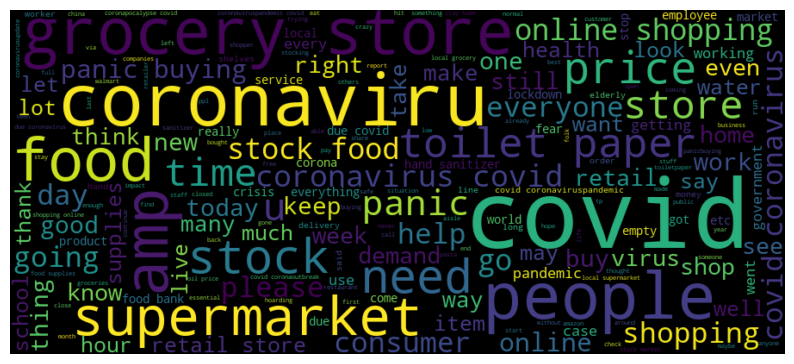

In [31]:
all_words = ' '.join(word_tokenize)

from wordcloud import WordCloud
wordcloud = WordCloud(width=900, height=400, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()